In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_excel("random_forest_dataset.xlsx", header=1)


In [3]:
print("\nMissing values in each column:")
print(df.isnull().sum())




Missing values in each column:
Sl No     0
USN       0
Name      0
Title     1
P1        0
C1        0
P2        0
C2        0
P3        0
C3        0
R1        8
T1        8
P3T       0
Total     0
Grade     8
dtype: int64


In [7]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)



<ipython-input-7-405109ac7049>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-7-405109ac7049>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [8]:
print("\nMissing values after treatment:")
print(df.isnull().sum())


Missing values after treatment:
Sl No     0
USN       0
Name      0
Title     0
P1        0
C1        0
P2        0
C2        0
P3        0
C3        0
R1        0
T1        0
P3T       0
Total     0
Grade     0
dtype: int64


In [9]:
df.columns = ['Sl No ', 'USN', 'Name', 'Title', 'P1', 'C1', 'P2', 'C2', 'P3',
              'C3', 'R1', 'T1', 'P3T', 'Total', 'Grade']

In [13]:
print(df.columns)

Index(['Sl No ', 'USN', 'Name', 'Title', 'P1', 'C1', 'P2', 'C2', 'P3', 'C3',
       'R1', 'T1', 'P3T', 'Total', 'Grade'],
      dtype='object')


In [14]:
X = df.drop(["Sl No ", "USN", "Name", "Title", "Grade"], axis=1)
y = df["Grade"]

In [15]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:

smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=2)  # Reduce k_neighbors
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)


In [21]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight="balanced",
    random_state=42
)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=300,
                       random_state=42)

In [22]:
feature_importances = pd.Series(rf.feature_importances_, index=df.columns[4:-1])
sorted_features = feature_importances.sort_values(ascending=False)

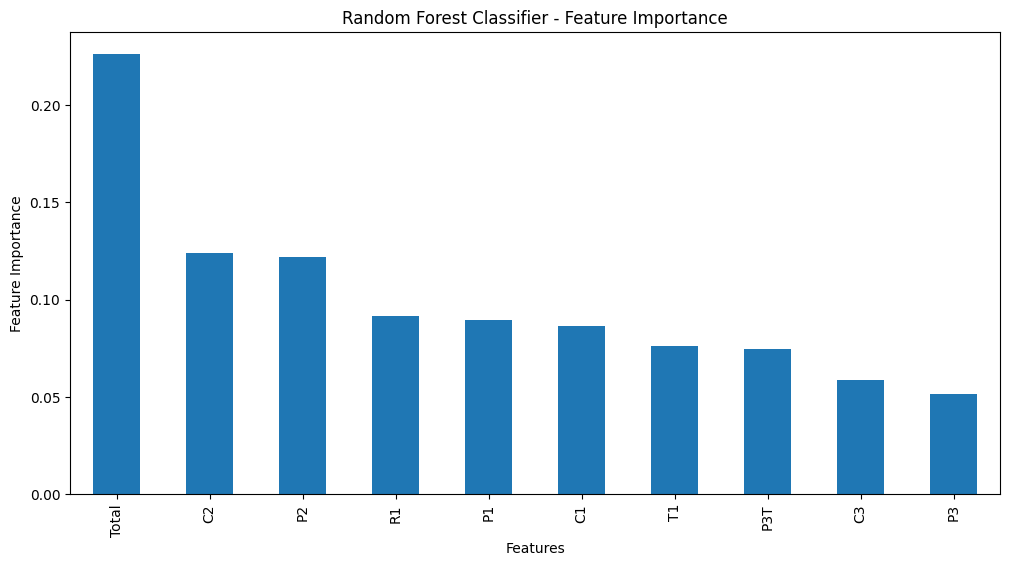

In [23]:
plt.figure(figsize=(12, 6))
sorted_features.plot.bar()
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Random Forest Classifier - Feature Importance")
plt.show()

In [24]:
y_pred = rf.predict(X_test)


In [25]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

In [26]:
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:")
print(report)

Accuracy: 95.56%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        14
           3       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.95        45
weighted avg       0.96      0.96      0.95        45



In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)


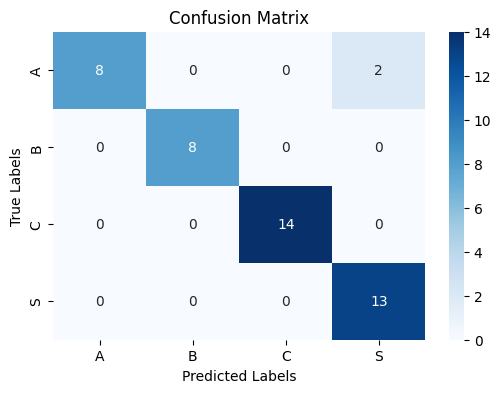

In [28]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()